In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1.Data Cleaning
#2.EDA (Explanatory data analysis)
#3. text preprocessing
#4. model building
#5. Evaluation
#6.Improvement
#7. website
#8. Deployment




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)



In [8]:
df.sample(5)

,v1,v2
1646,ham,Thts wat Wright Brother did to fly..
3438,ham,"awesome, how do I deal with the gate? Charles ..."
2472,spam,Final Chance! Claim ur å£150 worth of discount...
1179,ham,To day class is there are no class.
2421,ham,Err... Cud do. I'm going to at 8pm. I haven't...


In [9]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4720,ham,"Yup. Anything lor, if u dun wan it's ok..."
1671,ham,Glad to see your reply.
3386,ham,So u workin overtime nigpun?
4548,ham,"Haha, my friend tyler literally just asked if ..."
3992,ham,Nimbomsons. Yep phone knows that one. Obviousl...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
#Remove duplicat
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

# 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x209a11413c0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

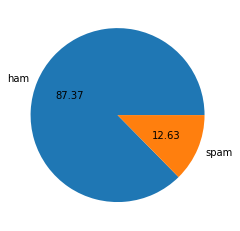

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [20]:
#Data is imbalanced

In [21]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

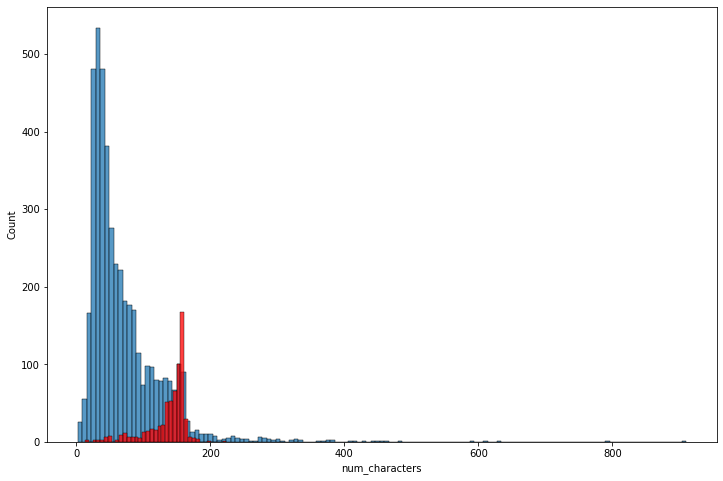

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])# spam
sns.histplot(df[df['target']==1]['num_characters'],color='red')# not spam

<AxesSubplot:xlabel='num_words', ylabel='Count'>

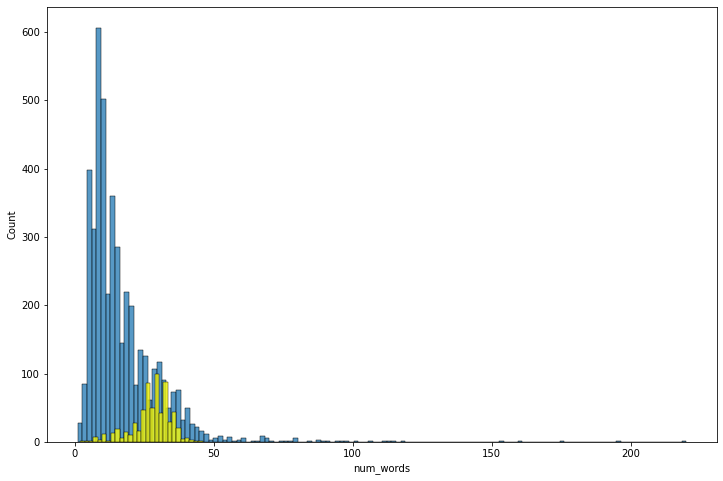

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

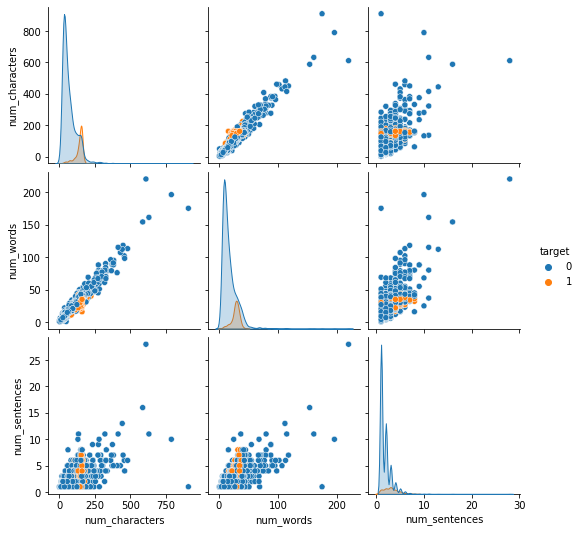

In [35]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

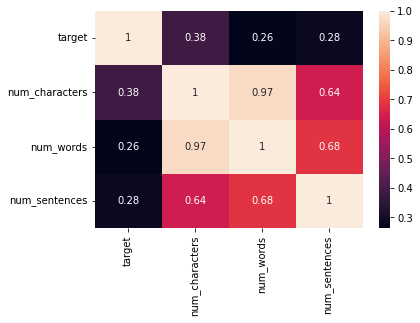

In [36]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing
# a) lower case
# b) Tokenization
# c) Removing special characters
# d) Removing stop words and punctuation
# e) stemming



In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [56]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuf'")

'gon na home soon want talk stuf'

In [54]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()
ps.stem('lovely')

'love'

In [57]:
transform_text("HELLO sohaM &%$")

'hello soham'

In [58]:
df['tramsformed_text']=df['text'].apply(transform_text)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,tramsformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
pip install WordCloud


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for WordCloud, since package 'wheel' is not installed.
  Running setup.py install for WordCloud: started
  Running setup.py install for WordCloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Running setup.py install for WordCloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_

In [66]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_

In [82]:
%pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.10\wordcloud
  UPDATING build\lib.win-amd64-3.10\wordcloud/_

In [84]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


ModuleNotFoundError: No module named 'wordcloud'